In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
from astropy.io import ascii
%pylab inline
import matplotlib
import matplotlib.colors as colors
import sklearn
from sklearn.mixture import GMM

Populating the interactive namespace from numpy and matplotlib


In [3]:
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
sns.set_palette(sns.color_palette(["#9b59b6", 
                                   "#e74c3c", "#3498db", 
                                   "#34495e", "#2ecc71"]))
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [4]:
data = pd.read_csv('../data/galaxy_all.csv', sep= ',') #MJ path
data = data[(data['sm']<10**11.4)&(data['sm']>10**9)&(data['sfr']>0)]
data[:0]

,GalaxyID,GroupID,SnapNum,Redshift,CentreOfMass_x,CentreOfMass_y,CentreOfMass_z,GroupNumber,SubGroupNumber,MassType_Star,...,StellarVelDisp,Vmax,sm,sfr,vel_disp,size,u_nodust,g_nodust,r_nodust,i_nodust


In [5]:
data = data.as_matrix()

In [6]:
u_r = data[:,-3] - data[:,-2]
ssfr = np.log10(data[:,-7]/data[:,-8]) 
ms = np.log10(data[:,-8])
galaxy_id = data[:,0]

In [7]:
red_id , blue_id = [] , [] 
K = 40
bins = np.linspace(9, 11.4, K)

In [8]:
for k in range(len(bins)-1):
    
    logm_min, logm_max  = bins[k], bins[k+1]
    mask = (ms>logm_min)&(ms<logm_max)
    ssfrm = ssfr[mask]
    median = np.median(ssfrm)
    gid = galaxy_id[mask]
    
    redmask = ssfrm < np.percentile(ssfrm,16) 
    bluemask = ssfrm > np.percentile(ssfrm,50)
    
    redmask = ssfrm < np.log10(0.8) + median
    bluemask = ssfrm > median    
    
    red_id.append(gid[redmask])
    blue_id.append(gid[bluemask])

In [9]:
red_id = np.array(red_id)
blue_id = np.array(blue_id)

In [10]:
red_id = np.concatenate(red_id, axis=0)
blue_id = np.concatenate(blue_id, axis = 0)

In [11]:
print red_id.shape
print blue_id.shape

(4167,)
(5348,)


In [12]:
red_mask = np.where(np.in1d(galaxy_id , red_id) == True)[0]

In [13]:
blue_mask = np.where(np.in1d(galaxy_id , blue_id) == True)[0]

Text(0.5,1,'sSFR split')

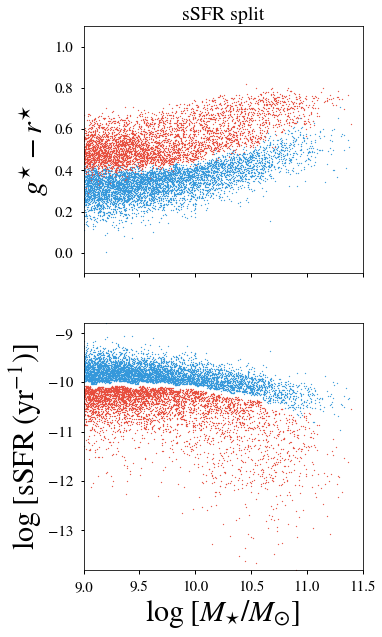

In [14]:
fig , ax = plt.subplots(nrows=2,ncols=1 , figsize=(5,10), sharex=True)
ax[0].scatter(ms[blue_mask], u_r[blue_mask], s= 1 , color = "#3498db")
ax[0].scatter(ms[red_mask], u_r[red_mask], s= 1 , color = "#e74c3c")
ax[1].scatter(ms[blue_mask], ssfr[blue_mask], s= 1 , color = "#3498db")
ax[1].scatter(ms[red_mask], ssfr[red_mask], s= 1 , color = "#e74c3c")
ax[0].tick_params(axis='both', labelsize=15)
ax[1].tick_params(axis='both', labelsize=15)
ax[0].set_ylabel("$g^{\star} - r^{\star}$", fontsize = 30)
ax[1].set_ylabel("$\log \; [\mathrm{sSFR}\; (\mathrm{yr}^{-1})]$", fontsize = 30)
ax[1].set_xlabel(r"$\log \; [M_{\star}/M_{\odot}]$", fontsize = 30)
ax[1].set_xlim([9,11.5])
ax[1].set_ylim([-13.8, -8.8])
ax[0].set_ylim([-0.1, 1.1])
ax[0].set_title("sSFR split", fontsize = 20) 